# Physics of a Bouncing Ball (1 Dimensional Motion)

Equations of motion:
\begin{align}
a &= -g = -9.81\ m/s^2\\[5pt]
v &= v_0 + at = v_0 - gt\\[5pt]
h &= h_0 + v_0t + \frac{1}{2}at^2 = h_0 + v_0t - \frac{1}{2}gt^2
\end{align}

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation

In [2]:
g = 9.81 # m/s^2
a = -g # m/s^2

def getVelocity(v_0, t):
    return v_0 + a*t # m/s

def getHeight(h_0, v_0, t):
    return h_0 + v_0*t + (0.5)*a*t**2 # m

### Animation (Freely Falling Body)

In [25]:
def genAnim(y_values, frame_values, x_lim, y_lim, ylabel, interval, filename):
  
  def update(frame):
    ball.set_data((0,), (y_values[frame],))
    return ball,

  fig, ax = plt.subplots()
  ax.set_xlim(*x_lim)
  ax.set_ylim(*y_lim)
  ax.set_ylabel(ylabel)
  ax.set_xticks([])
  ax.set_xticklabels([])
  ax.grid(True)

  ball, = ax.plot([], [], 'bo')

  anim = FuncAnimation(fig, update, frames=frame_values.shape[0],interval=interval, blit=False)
  anim.save(f"animations/{filename}.gif", writer='pillow')

In [26]:
u = 10 # m/s
h_0 = 0 # m

time_vals = np.linspace(0, 3, 100)
height_vals = getHeight(h_0, u, time_vals)
vel_vals = getVelocity(u, time_vals)

mask = height_vals < h_0
height_vals[mask] = h_0
vel_vals[mask] = 0

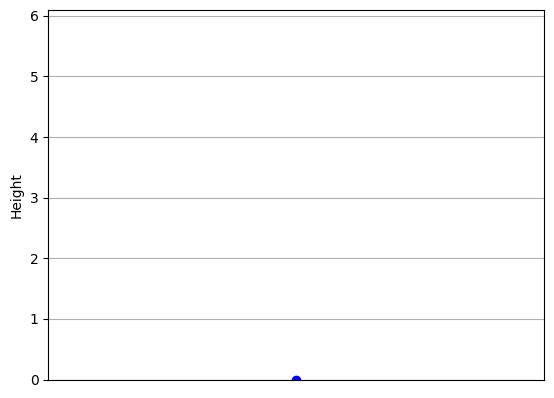

In [27]:
H = (-u**2) / (2*a) # m

genAnim(height_vals, time_vals, [-1, 1], [0, H+1], 'Height', 50, 'freely_falling_body')

## Bounce

The time taken by the ball to reach maximum height is:

\begin{align*}
v &= v_0 + at\\[5pt]
0 &= v_0 + at\\[5pt]
t &= -\frac{v_0}{a}
\end{align*}

Therefore, the time taken by the ball for its entire journey is:
\begin{align*}
T &= 2\times t\\[5pt]
\implies T &= -\frac{2v_0}{a}
\end{align*}

In [29]:
v_0 = 10 # m/s
h_0 = 0 # m
T = -2 * v_0 / a # Time of flight (s)

t_start = 0 # s
t_end = 10 # s
dt = 0.01 # s
time_values = np.arange(t_start, t_end, dt) # s

height_values = [] # m
velocity_values = [] # m/s

for t in time_values:
    bounce_num = np.floor(t / T)
    t_val = t - bounce_num*T

    h_val = getHeight(h_0, v_0, t_val)
    v_val = getVelocity(v_0, t_val)

    height_values.append(h_val)
    velocity_values.append(v_val)

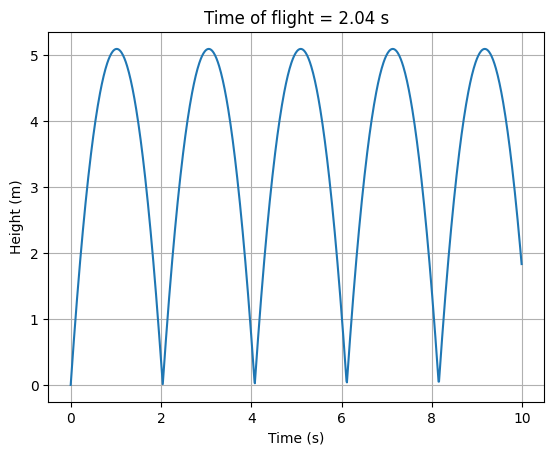

In [30]:
plt.plot(time_values, height_values)
plt.title(f"Time of flight = {T:.2f} s")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.grid(True)

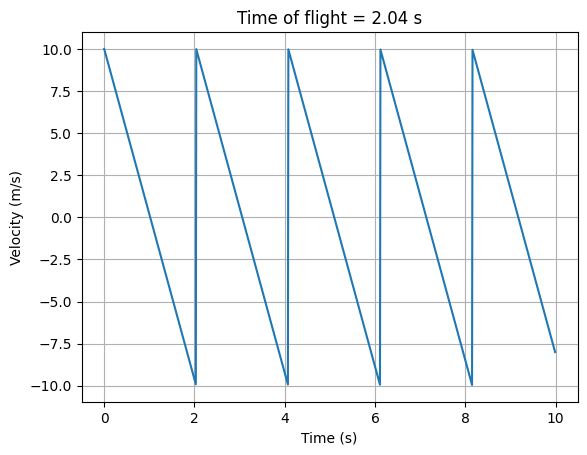

In [31]:
plt.plot(time_values, velocity_values)
plt.title(f"Time of flight = {T:.2f} s")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)

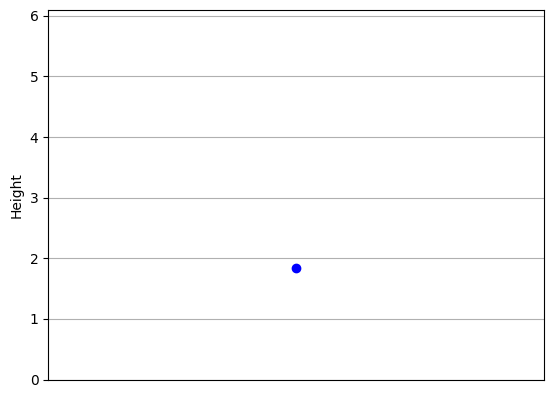

In [32]:
H = (-v_0**2) / (2*a)

genAnim(height_values, time_values, [-1, 1], [0, H+1], 'Height', 50, 'bouncing_ball')

## Realistic Bouncing (Loss of Energy)

When a ball impacts a surface, the surface recoils and vibrates, as does the ball, creating both sound and heat, and the ball loses kinetic energy. Additionally, the impact can impart some rotation to the ball, transferring some of its translational kinetic energy into rotational kinetic energy. This energy loss is usually characterized (indirectly) through the coefficient of restitution (or COR, denoted e): $$e = -\frac{v_f - u_f}{v_i - u_i}$$ where $v_f$ and $v_i$ are the final and initial velocities of the ball, and $u_f$ and $u_i$ are the final and initial velocities impacting surface, respectively. In the specific case where a ball impacts on an immovable surface, the COR simplifies to $$e = -\frac{v_f}{v_i}$$

For a ball dropped against a floor, the COR will therefore vary between `0 (no bounce, total loss of energy) and 1 (perfectly bouncy, no energy loss)`.

For a straight drop on the ground with no rotation, with only the force of gravity acting on the ball, the COR can be related to several other quantities by:

$$e = \left|\frac{v_i}{v_{i-1}}\right| = \sqrt{\frac{K_i}{K_{i-1}}} = \sqrt{\frac{U_i}{U_{i-1}}} = \sqrt{\frac{H_i}{H_{i-1}}} = \frac{T_i}{T_{i-1}}$$

The energy loss at impact can be related to the COR by: $$\text{Energy Loss} = \frac{K_{i-1} - K_i}{K_{i-1}}\times 100\% = (1-e^2)\times 100%$$

Let's examine the velocity terms for $n$ bounces:
\begin{align*}
v^0_1 &= v^0_1\\[5pt]
v^0_2 &= v^0_1\times e \\[5pt]
v^0_3 &= v^0_2\times e = v^0_1\times e^2 \\[5pt]
v^0_4 &= v^0_3\times e = v^0_1\times e^3 \\[5pt]
&\vdots \\[5pt]
v^0_n &= v^0_{n-1}\times e = v^0_1\times e^{n-1} \\[5pt]
\implies v^0_n &= v^0_1\times e^{n-1}
\end{align*}
Similarly, for the maximum height and time-of-flight terms:
\begin{align*}
H^0_n &= H^0_1\times e^{2(n-1)}\\[5pt]
T^0_n &= T^0_1\times e^{n - 1}
\end{align*}
Since this is a geometric progression, the total time-of-flight for $n$ bounces is:
$$T_{\text{total}} = T^0_1\left(\frac{1 - e^n}{1 - e}\right)$$

In [33]:
v_1 = 10 # m/s
h_1 = 0 # m

t_start = 0
t_end = 10
dt = 1e-2
parent_time_values = np.arange(t_start, t_end, dt)

e = 0.7
height_values = []
velocity_values = []

t = 0
bounce = 1
v_n = v_1

for _ in parent_time_values:
    h = getHeight(h_1, v_n, t)

    if h < h_1:
        h = h_1
        bounce += 1
        v_n = v_1 * e**(bounce - 1)

        t = 0

    v = getVelocity(v_n, t)

    height_values.append(h)
    velocity_values.append(v)

    t += dt

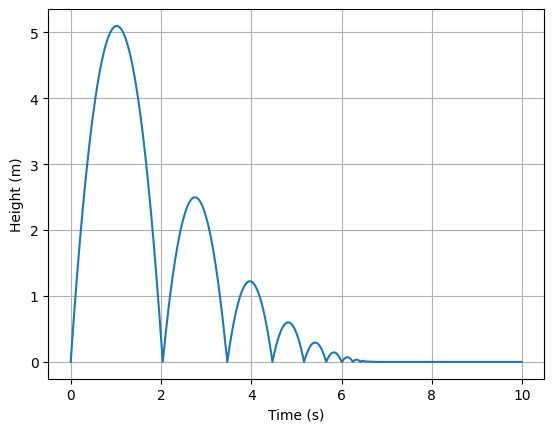

In [34]:
plt.plot(parent_time_values, height_values)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.grid(True)

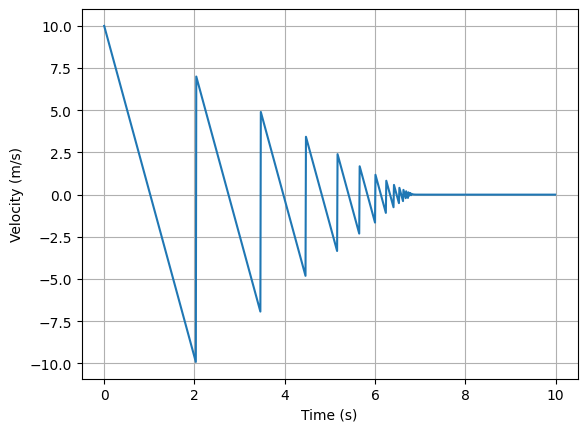

In [35]:
plt.plot(parent_time_values, velocity_values)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)

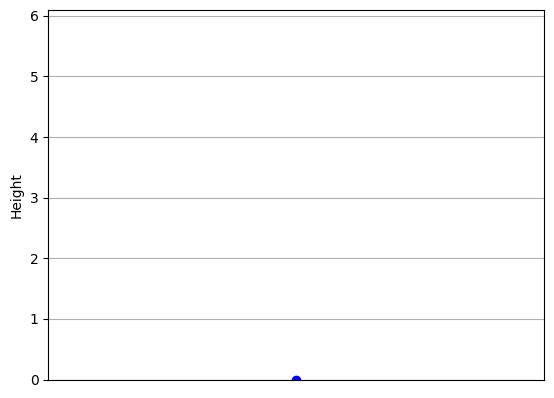

In [36]:
H_1 = (-v_1**2) / (2*a)

genAnim(height_values, time_values, [-1, 1], [0, H_1+1], 'Height', 50, 'bouncing_ball_energy_loss')

In [40]:
height_values = np.array(height_values)
velocity_values = np.array(velocity_values)

In [41]:
m = 1 # kg
pe_values = m * g * height_values
ke_values = (1/2) * m * velocity_values ** 2
te_values = pe_values + ke_values

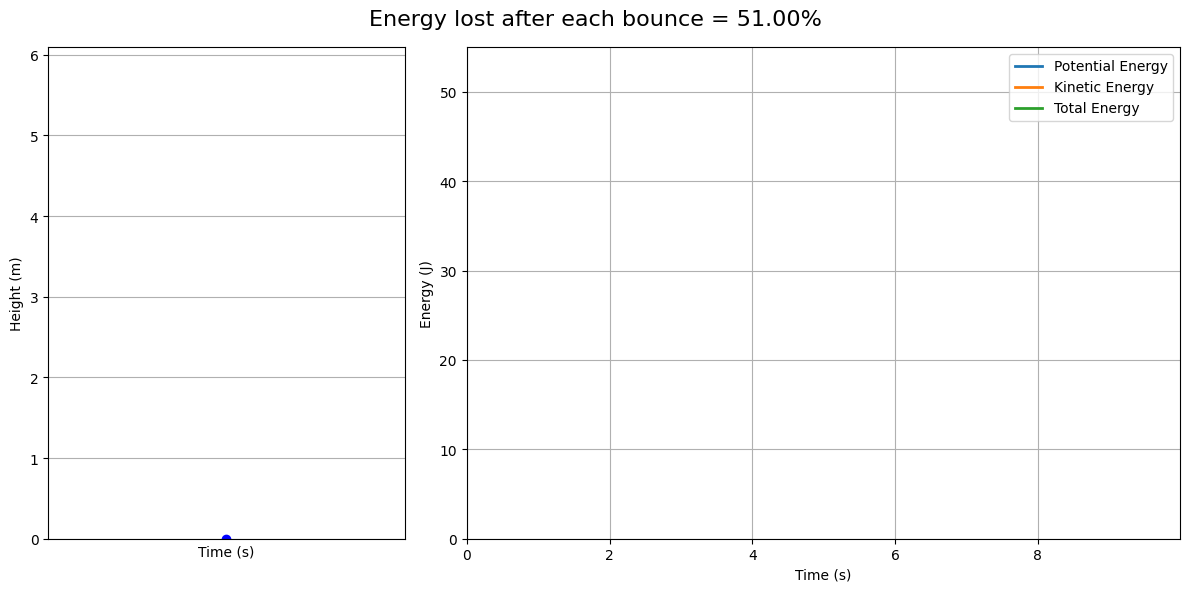

In [55]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1,2,width_ratios=[1,2])

ax0 = fig.add_subplot(gs[0])
ax0.set_xlim(-0.3, 0.3)
ax0.set_ylim(0, H_1 + 1)
ax0.set_ylabel("Height (m)")
ax0.set_xlabel("Time (s)")
ax0.set_xticks([])
ax0.set_xticklabels([])
ax0.grid(True)

ball, = ax0.plot([], [], 'bo')

ax1 = fig.add_subplot(gs[1])
ax1.set_xlim(time_values[0], time_values[-1])
ax1.set_ylim(0, te_values.max()+5)
ax1.set_ylabel("Energy (J)")
ax1.set_xlabel("Time (s)")
ax1.grid(True)

pe_line, = ax1.plot(time_values[0], pe_values[0], label='Potential Energy', lw=2)
ke_line, = ax1.plot(time_values[0], ke_values[0], label='Kinetic Energy', lw=2)
te_line, = ax1.plot(time_values[0], te_values[0], label='Total Energy', lw=2)
ax1.legend(loc='best')

plt.subplots_adjust(wspace=0.3, top=0.85)
fig.suptitle(f'Energy lost after each bounce = {(1-e**2)*100:.2f}%', fontsize=16)

def update(frame):
  ball.set_data((0,), (height_values[frame],))
  pe_line.set_data(time_values[:frame], pe_values[:frame])
  ke_line.set_data(time_values[:frame], ke_values[:frame])
  te_line.set_data(time_values[:frame], te_values[:frame])

  return ball, pe_line, ke_line, te_line,

fig.tight_layout()
anim = FuncAnimation(fig, update, frames=time_values.shape[0], interval=20, blit=False)
anim.save('animations/ball_energy_combined.gif', writer='pillow')